In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
races = dict()

for path in glob('../../data/processed/*'):
    filename = os.path.basename(path)
    races[filename[0].upper()] = pd.read_csv(path, index_col=0)

In [3]:
protoss_df = races['T'].copy(deep=True)

In [4]:
times = dict()
for i in protoss_df.match_id.unique():
    
    protoss_df[protoss_df.match_id == 6]

In [5]:
grouped_df = protoss_df.loc[:, ['match_id', 'map_name', 'region', 'enemy_race', 'win']]
grouped_df = grouped_df.groupby(grouped_df['match_id']).head(1)

In [6]:
grouped_df.head()

,match_id,map_name,region,enemy_race,win
0,1,World of Sleepers LE,us,P,True
21,3,Triton LE,us,P,True
48,4,Ephemeron LE,us,T,False
108,7,Acropolis LE,us,T,False
156,8,Winter's Gate LE,us,P,False


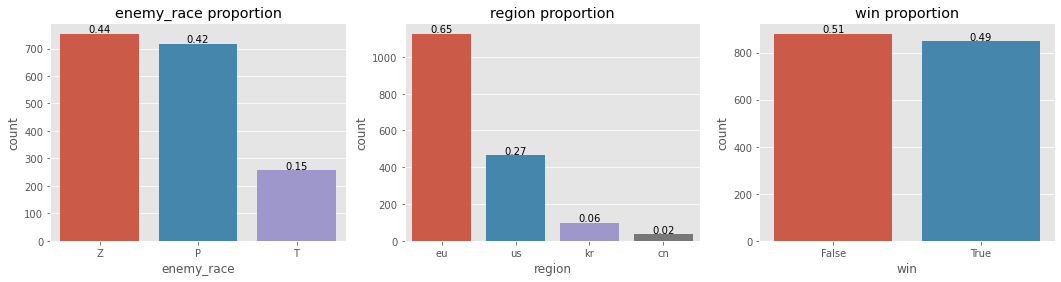

In [7]:
shape = (1,3)
fig = plt.figure(figsize=(18,4))

for i, feature in enumerate(['enemy_race', 'region', 'win']):
    ax = fig.add_subplot(*shape,i+1)
    ax.title.set_text('{} proportion'.format(feature))
    sns.countplot(data=grouped_df, x=feature, order=grouped_df[feature].value_counts().index, ax=ax)

    for p in ax.patches:
        height, width = p.get_height(), p.get_width()
        x, y = p.get_x()+width/2, height+6
        text = '{:1.2f}'.format(height/len(grouped_df))
        
        ax.text(x, y, text, ha='center')

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


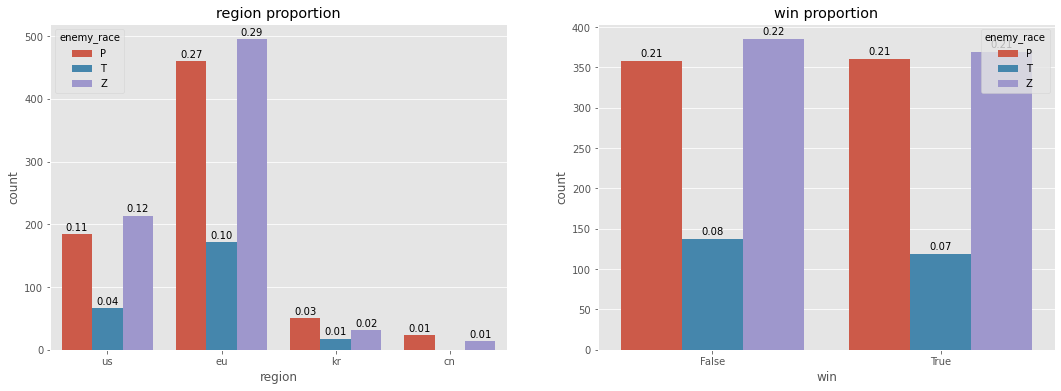

In [8]:
shape = (1,2)
fig = plt.figure(figsize=(18,6))

for i, feature in enumerate(['region', 'win']):
    ax = fig.add_subplot(*shape,i+1)
    ax.title.set_text('{} proportion'.format(feature))
    sns.countplot(data=grouped_df, x=feature, hue='enemy_race', ax=ax)

    for p in ax.patches:
        height, width = p.get_height(), p.get_width()
        x, y = p.get_x()+width/2, height+6
        text = '{:1.2f}'.format(height/len(grouped_df))
        
        ax.text(x, y, text, ha='center')

plt.show()

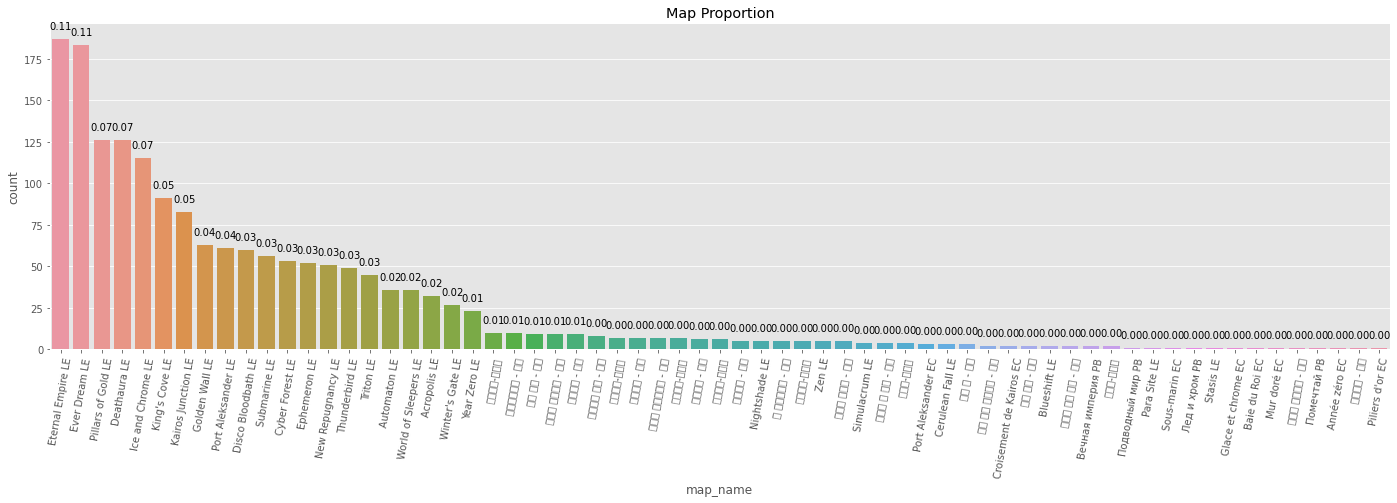

In [9]:
plt.figure(figsize=(24, 6))
ax = sns.countplot(data=grouped_df, x='map_name', order=grouped_df.map_name.value_counts().index)
plt.xticks(rotation=80)
plt.title('Map Proportion')

for p in ax.patches:
        height, width = p.get_height(), p.get_width()
        x, y = p.get_x()+width/2, height+6
        text = '{:1.2f}'.format(height/len(grouped_df))
        
        ax.text(x, y, text, ha='center')

plt.show()

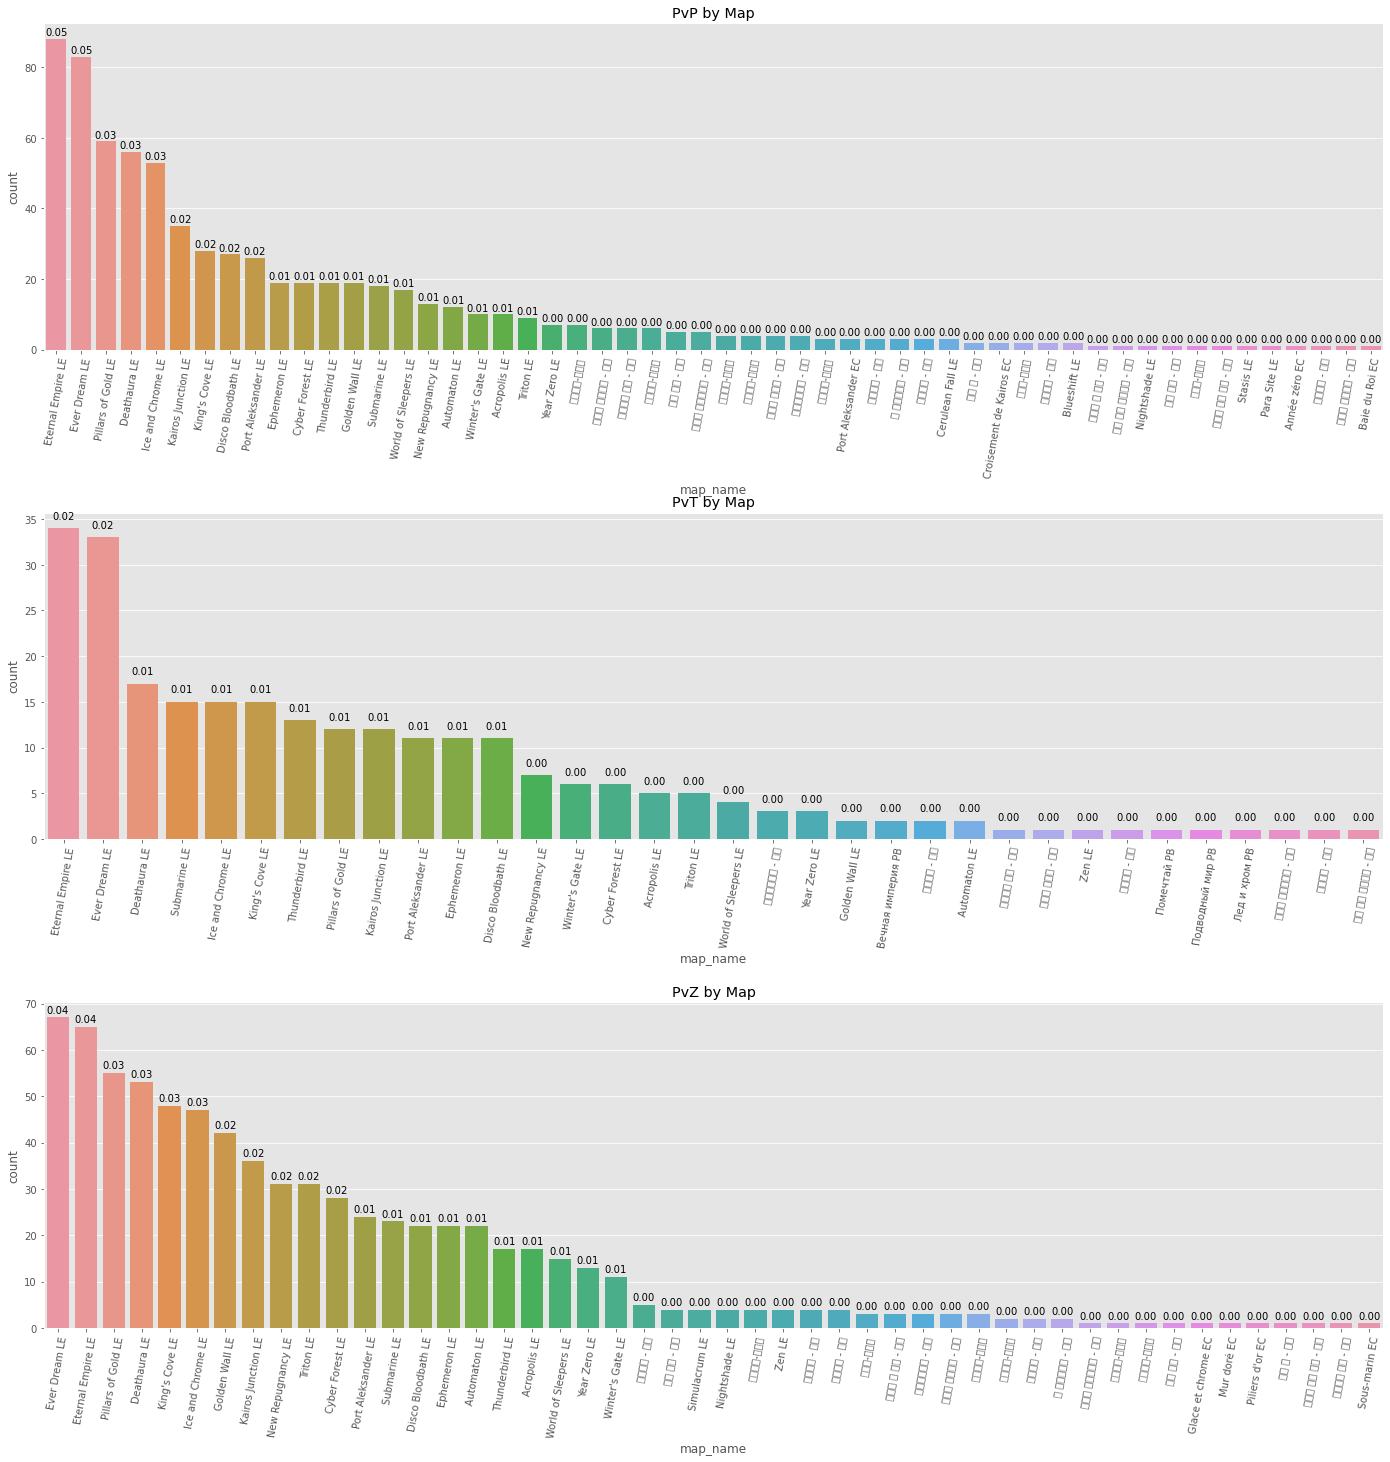

In [10]:
shape = (3,1)
fig = plt.figure(figsize=(24, 24))

for i, enemy_race in enumerate(['P','T','Z']):
    ax = fig.add_subplot(*shape,i+1)
    ax.title.set_text('Tv{} by Map'.format(enemy_race))
    tdf = grouped_df[grouped_df.enemy_race == enemy_race]
    ax = sns.countplot(data=tdf, x='map_name', order=tdf.map_name.value_counts().index, ax=ax)
    plt.xticks(rotation=80)

    for p in ax.patches:
            height, width = p.get_height(), p.get_width()
            x, y = p.get_x()+width/2, height+1
            text = '{:1.2f}'.format(height/len(grouped_df))
            
            ax.text(x, y, text, ha='center')

plt.subplots_adjust(hspace=.5)
plt.show()

In [11]:
show_map_count = grouped_df.map_name.value_counts().sort_values(ascending=False)
show_data = dict(occurences=show_map_count.values)
for race in ['P','T','Z']:
    show_data[race] = grouped_df[grouped_df.enemy_race == race].map_name.value_counts()

show_df = pd.DataFrame(show_data, index=show_map_count.index, dtype='int32')

In [12]:
show_df.head()

,occurences,P,T,Z
Eternal Empire LE,187,88.0,34.0,65.0
Ever Dream LE,183,83.0,33.0,67.0
Pillars of Gold LE,126,59.0,12.0,55.0
Deathaura LE,126,56.0,17.0,53.0
Ice and Chrome LE,115,53.0,15.0,47.0
